# Simulazione Monte Carlo {#sec-montecarlo}

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

## Stima dell'integrale di un cerchio

In questo esempio, usiamo il metodo di Monte Carlo per stimare l'area di una regione geometrica, ovvero un cerchio. Il metodo di Monte Carlo si basa sulla generazione casuale di punti all'interno di un dominio conosciuto e sulla valutazione di quanti di questi punti cadono all'interno della regione di interesse. L'idea è che la frazione di punti all'interno della regione rispetto al totale dei punti generati sia proporzionale all'area della regione stessa.

Nella figura seguente, coppie casuali di numeri (ad esempio, x e y) sono scelti all'interno di un quadrato di dimensioni $2 \times 2$. Calcolando il rapporto tra il numero di punti che cadono all'interno del cerchio e tutti i campioni, possiamo ottenere un'approssimazione dell'area del cerchio moltiplicando l'area del quadrato per il rapporto dei campioni. Questo tipo di algoritmo è una forma di *rejection sampling* di Monte Carlo. Dopo aver eseguito il codice con un grande numero di campioni, l'area stimata del cerchio si avvicina al valore teorico di π (pi greco), che è il valore atteso per l'area di un cerchio unitario. La precisione della stima aumenta con il numero di campioni usati.

Ecco come funziona il codice Python presentato di seguito:

1. Iniziamo generando "samples" punti casuali all'interno di un quadrato con vertici (-1, -1) e (1, 1). Questo quadrato contiene il cerchio di raggio 1 in cui desideriamo calcolare l'area.

2. Per ciascun punto generato, calcoliamo la distanza dal centro del cerchio utilizzando la formula della distanza euclidea: `distance = x**2 + y**2`.

3. Se la distanza calcolata è minore o uguale a 1, il punto è all'interno del cerchio, quindi incrementiamo la variabile "inside_circle" e aggiungiamo le coordinate (x, y) a due elenchi separati: "x_inside" e "y_inside". Altrimenti, aggiungiamo le coordinate ad altri due elenchi separati: "x_outside" e "y_outside".

4. Alla fine del ciclo, calcoliamo l'area stimata del cerchio utilizzando la formula: `area_estimate = (inside_circle / samples) * 4` (la lunghezza di ogni lato del quadrato è pari a 2). Questo perché il rapporto tra i punti all'interno del cerchio e il totale dei punti generati è proporzionale all'area del cerchio rispetto all'area del quadrato circoscritto.

5. Infine, motriamo una rappresentazione visiva del cerchio, dei punti interni (in verde) e dei punti esterni (in blu) attraverso un grafico a dispersione.

In [13]:
def monte_carlo_circle_area(samples):
    inside_circle = 0

    # Per la visualizzazione
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(samples):
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)  # Punti casuali nel quadrato
        distance = x**2 + y**2  # Distanza dal centro
        if distance <= 1:  # Se il punto è dentro il cerchio
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    # Calcolo dell'area
    area_estimate = (inside_circle / samples) * 4

    # Visualizzazione
    fig, ax = plt.subplots(figsize=(4, 4))
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_artist(circle)
    ax.scatter(x_inside, y_inside, color='gray', s=1)
    ax.scatter(x_outside, y_outside, color='blue', s=1)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal', adjustable='box')
    plt.title(f"Stima dell'Area del Cerchio con {samples} Campioni")
    plt.show()

    return area_estimate

Test dell'algoritmo con 1000 campioni.

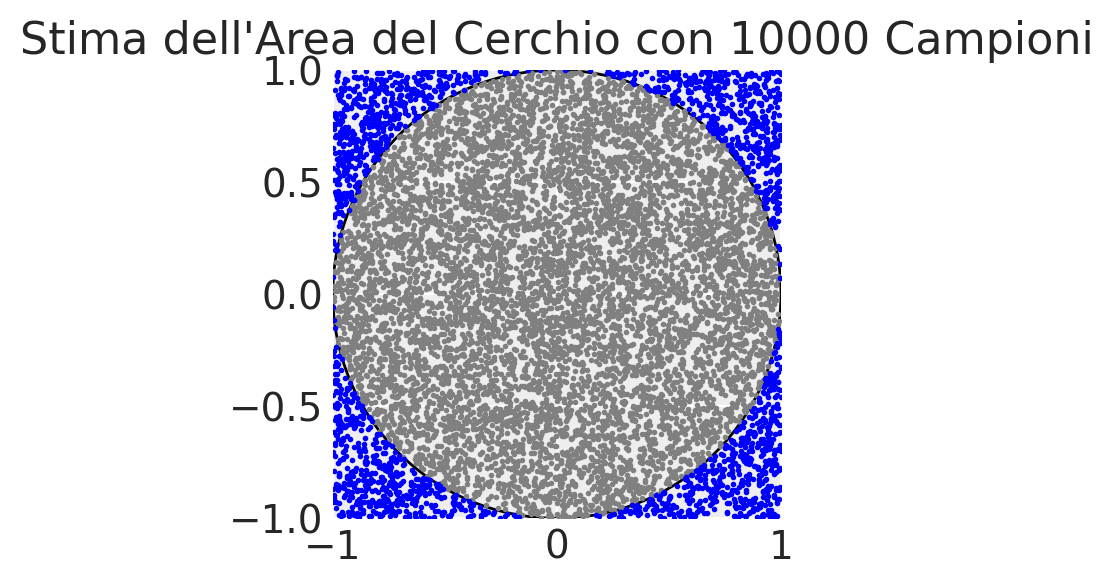

3.1588

In [14]:
estimated_area = monte_carlo_circle_area(1000)
estimated_area

In questo esempio ottieniamo una stima dell'area del cerchio (A = π r²) usando il metodo di Monte Carlo con 1000 campioni. Questo metodo può essere esteso a un numero maggiore di campioni per ottenere una stima più precisa, poiché la precisione della stima aumenta con il numero di campioni generati.

La funzione senza visualizzazione è riscritta qui sotto.

In [9]:
def calcola_area_cerchio_metodo_monte_carlo(numero_campioni):
    """
    Calcola l'area di un cerchio di raggio unitario utilizzando il metodo di Monte Carlo.
    
    Args:
    numero_campioni (int): Numero di punti casuali generati per la stima.
    
    Returns:
    float: Stima dell'area del cerchio.
    """
    
    punti_dentro_cerchio = 0  # Contatore per i punti che cadono all'interno del cerchio

    # Generazione di punti casuali e verifica se cadono all'interno del cerchio
    for _ in range(numero_campioni):
        x, y = np.random.uniform(-1, 1, size=2)  # Genera coordinate x, y casuali nel quadrato [-1, 1]x[-1, 1]
        distanza_dal_centro = x**2 + y**2  # Calcola la distanza quadratica dal centro (0,0)
        
        # Controlla se il punto (x, y) è all'interno del cerchio di raggio 1
        if distanza_dal_centro <= 1:
            punti_dentro_cerchio += 1

    # Calcolo dell'area stimata del cerchio usando il rapporto dei punti all'interno del cerchio
    # rispetto al numero totale di campioni, moltiplicato per l'area del quadrato circoscritto (4).
    area_stimata = (punti_dentro_cerchio / numero_campioni) * 4

    return area_stimata


Questa funzione accetta come input il numero di campioni da generare (`numero_campioni`) e restituisce una stima dell'area del cerchio. L'approccio si basa sulla proporzionalità tra l'area del cerchio e l'area del quadrato che lo circoscrive: dato che l'area del quadrato è 4 (dato che il lato del quadrato è 2 e l'area è quindi $2^2$), la stima dell'area del cerchio viene ottenuta moltiplicando per 4 il rapporto tra i punti che cadono all'interno del cerchio e il numero totale di punti generati.

In [10]:
calcola_area_cerchio_metodo_monte_carlo(100000)

3.14696